In [ ]:
#Technical Analysis Systems (Apostolos Dasilas)
#Taouktsis Xenofon (dai19312)
#Υπολογισμοί του RSI και Ανάλυση Plot
#Δεδομένα από το [investing.com]
#Τα δεδομένα (.csv) όπως τα κατεβάζουμε απευθείας από το investing.com
#Το αρχείο θα έχει όνομα συμβόλου και μετατροπή από π.χ. ETH.csv σε ETH_md.csv
#UPDATE 111220 - v6

**Relative Strength Index (RSI) Analysis**

**Εισαγωγή Functions**

In [ ]:
#Βήμα 1 | Libraries Input
from google.colab import files
import pandas as pd
import numpy as np
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates

In [ ]:
#Βήμα 2 | Upload Dataset Function
def upload_dataset():
    data_upload = files.upload()
    filename = list(data_upload.keys())[0]
    filename = re.sub(".csv", "", filename)
    return filename

In [ ]:
#Βήμα 3 | Plot Dataset Function
def plot_dataset(dataset):
    plt.style.use('fivethirtyeight')
    symbol_name = re.sub("_md", "", filename)
    resize_figure = plt.figure(figsize=(12.5,5))
    #start_date = dataset['Date'].iloc[0]
    #end_date = dataset['Date'].iloc[-1]
    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

    plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')

    plt.title('Symbol: ' + symbol_name + ' [Price History]')
    #plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('Price USD ($)')
    #plt.legend()
    return plt.show()

In [ ]:
#Βήμα 4 | RSI Dataset Calculation and Plot Function
def rsi_indicator(dataset):

    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

    dd = dataset['Price'].diff(1)
    dd = dd.dropna()
    up_values =  dd.copy()
    down_values = dd.copy()
    up_values[up_values < 0] = 0
    down_values[down_values > 0] = 0
    period_value = 14
    average_gain = up_values.rolling(window=period_value).mean()
    average_loss = abs(down_values.rolling(window=period_value).mean())
    rs_value = average_gain / average_loss
    rsi_value = 100 - (100/ (1 + rs_value))

    #RSI VALUES PLOT
    dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))
    plt.style.use('fivethirtyeight')
    resize_figure = plt.figure(figsize=(12.5,5))
    symbol_name = re.sub("_md", "", filename)
    #start_date = dataset['Date'].iloc[0]
    #end_date = dataset['Date'].iloc[-1]
    plt.plot(rsi_value, label = symbol_name, alpha = 0.80, color = 'violet')
    plt.title('Symbol: ' + symbol_name + ' [RSI PLOT]')
    #plt.xlabel('{} to {}'.format(start_date, end_date))
    plt.ylabel('RSI Values (0 - 100)')
    plt.show()

    return rsi_value

In [ ]:
#Βήμα 5 | Total Plot PRICE VALUE and RSI RESULTS
def total_plot_rsi(dataset,rsi_result):
      plt.style.use('fivethirtyeight')
      resize_figure = plt.figure(figsize=(13,5))

      symbol_name = re.sub("_md", "", filename)
      #start_date = dataset['Date'].iloc[0]
      #end_date = dataset['Date'].iloc[-1]
      dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))

      #Dataset Price Plot
      plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')
      plt.title('Symbol: ' + symbol_name + ' [Price History]')
      plt.ylabel('Price USD ($)')
      plt.tight_layout()
      plt.show()

      #RSI PLOT with Lines 0-100
      resize_figure = plt.figure(figsize=(13,5))
      plt.plot(rsi_result, label = symbol_name, alpha = 0.80, color = 'violet')

      plt.axhline(30, linestyle='dotted',color = 'forestgreen')
      plt.axhline(70, linestyle='dotted', color = 'red')

      plt.title('RSI PLOT')
      #plt.xlabel('{} to {}'.format(start_date, end_date))
      plt.ylabel('RSI Values (0 - 100)')
      plt.tight_layout()
      plt.show()
      return

In [ ]:
#Βήμα 6 | RSI SIGNALS Buy or Sell
def rsi_signals_buy_sell(dataset,rsi_result):
  signal_rsi = "nothing"
  signals_rsi = []
  for i in range(len(rsi_result)):
          if rsi_result[i] < 30:
                    signal_rsi = 'buy'
          elif rsi_result[i] > 70:
                    signal_rsi = 'sell'
          else:
                   signal_rsi = "nothing"
          signals_rsi.append(signal_rsi)
  rsi_signals_report = pd.DataFrame()
  rsi_signals_report["RSI_VALUES"] = rsi_result
  rsi_signals_report["SIGNALS"] = signals_rsi
  dates_to_buy = rsi_signals_report.loc[rsi_signals_report['SIGNALS']=='buy']
  dates_to_sell = rsi_signals_report.loc[rsi_signals_report['SIGNALS']=='sell']
  return dates_to_buy,dates_to_sell

**Απευθείας CSV to CSV_md - INVESTING.COM**

In [ ]:
#Βήμα SOS
#Direct CSV to CSV_md (investing.com)
def md_csv_dataset(filename):
    chart = pd.read_csv(filename+".csv",
                        sep = ',')
    n_col = len(chart.columns)
    chart = chart.drop(chart.columns[n_col-1],axis=1)

    if len(chart.columns) < 6 :
        chart['Volume'] = 0
        id = 1
    else :
        id = 0

    chart.columns = ['Date','Price',
                    'Open','High',
                    'Low','Volume']

    #Μορφή Ημερομηνίας
    chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')

    chart = chart.replace(',','', regex=True)
    chart = chart.replace('%','', regex=True)
    chart.iloc[:,1:6] = chart.iloc[:,1:6].replace('-','0', regex=True)

    chart['Date'] = chart['Date'].astype(np.datetime64)
    chart['Date'] = chart['Date'].dt.date
    chart['Price'] = chart['Price'].astype(np.float64)
    chart['Open'] = chart['Open'].astype(np.float64)
    chart['High'] = chart['High'].astype(np.float64)
    chart['Low'] = chart['Low'].astype(np.float64)

    if id!=1:
        for i in range(len(chart)):
            tmp_value = chart.iloc[i,5]
            if tmp_value != re.sub("K", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("K", "",tmp_value)) * 1000
            elif tmp_value != re.sub("M", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("M", "",tmp_value)) * 1000000
            elif  tmp_value != re.sub("B", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("B", "",tmp_value)) * 1000000000
        chart['Volume'] = chart['Volume'].astype(np.float64)
    else:
        #update 111220
        chart['Volume'] = 0 #Υπήρχε θέμα με το volume οπότε το θέτω με μηδέν ( 0 ) όταν δεν υπάρχει η στήλη από το investing.com
        #md_col = len(chart.columns)
        #chart = chart.drop(chart.columns[md_col-1],axis=1)

    chart.sort_values(by=['Date'], inplace=True, ascending=True)

    #update 081220
    chart.index = range(len(chart['Date']))

    return chart

**Αρχή Διαδικασιών RSI**

In [ ]:
#Βήμα 1 | Upload .csv Dataset (.csv)
filename = upload_dataset()
filename
#Το αποτέλεσμα θα είναι π.χ. filename = "AAPL"

Saving USD_JPY_Historical_Data.csv to USD_JPY_Historical_Data.csv


'USD_JPY_Historical_Data'

In [ ]:
#Βήμα 2 | Creation of Dataset (load .csv file)
#Επιλογές Υποδιαστολής
#American xlsx επιλογή decimal_select = '.' εάν το csv έχει αποθηκευτεί με ( . )
#European xlsx επιλογή decimal_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#Επιλογή Διαχωρισμού Στηλών
#European xlsx sep_select = ';' εάν το csv έχει αποθηκευτεί με ( ; )
#American xlsx sep_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#decimal_select = ',' #Υποδιαστολή
#sep_select = ';' #Διαχωρισμός Στηλών

dataset = md_csv_dataset(filename)
dataset

Date   Price    Open    High     Low  Volume
0    2019-10-31  108.03  108.83  108.91  107.92       0
1    2019-11-01  108.19  108.06  108.33  107.89       0
2    2019-11-04  108.58  108.19  108.66  108.17       0
3    2019-11-05  109.16  108.58  109.25  108.55       0
4    2019-11-06  108.97  109.17  109.19  108.81       0
..          ...     ...     ...     ...     ...     ...
282  2020-11-30  104.27  104.07  104.42  103.82       0
283  2020-12-01  104.30  104.32  104.59  104.18       0
284  2020-12-02  104.40  104.32  104.76  104.22       0
285  2020-12-03  103.83  104.39  104.54  103.67       0
286  2020-12-04  104.14  103.85  104.25  103.74       0

[287 rows x 6 columns]

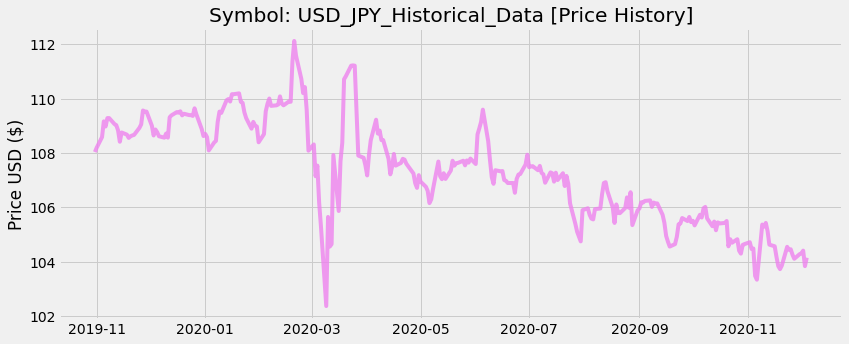

In [ ]:
#Βήμα 3 | Plot Dataset
plot_dataset(dataset)

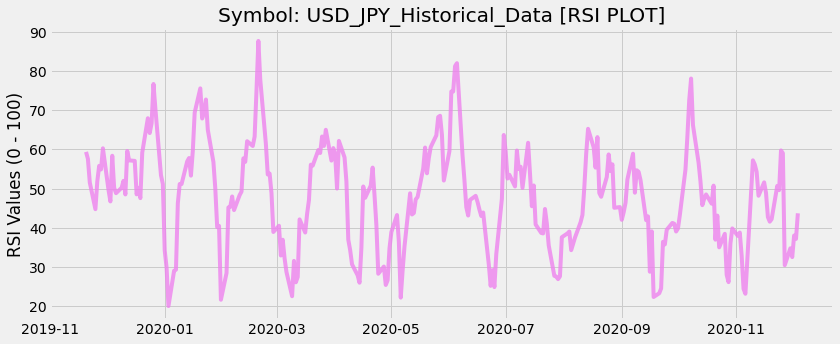

2019-11-01          NaN
2019-11-04          NaN
2019-11-05          NaN
2019-11-06          NaN
2019-11-07          NaN
                ...    
2020-11-30    34.743202
2020-12-01    32.500000
2020-12-02    38.000000
2020-12-03    37.133550
2020-12-04    43.674699
Name: Price, Length: 286, dtype: float64

In [ ]:
#Βήμα 4 | Relative Strength Index (RSI) Calculation
rsi_result = rsi_indicator(dataset)
rsi_result

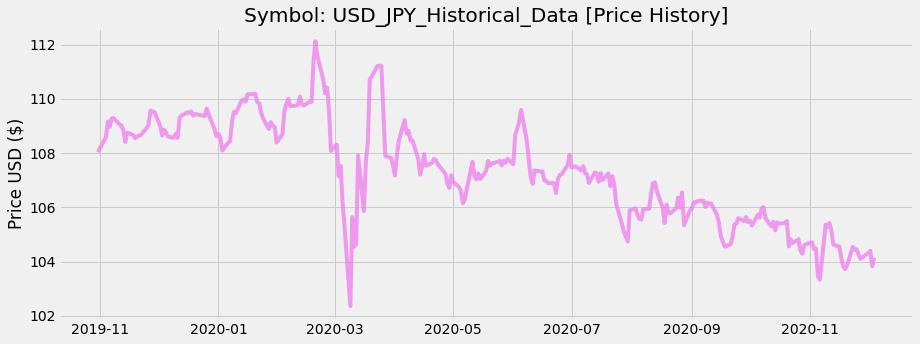

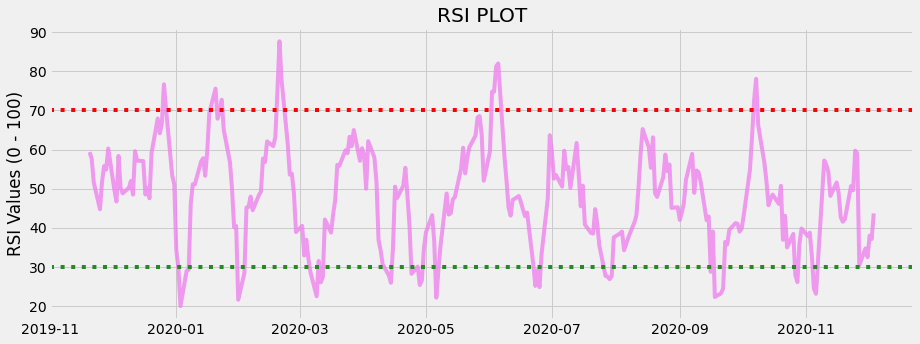

In [ ]:
#Βήμα 5| PRICE (adj close) and RSI total Plot Analysis
total_plot_rsi(dataset,rsi_result)

In [ ]:
#Βήμα 6| RSI Signals (Buy or Sell)
signal_buy, signal_sell = rsi_signals_buy_sell(dataset,rsi_result)

In [ ]:
#Βήμα 7| RSI Signal 'Buy'
signal_buy

RSI_VALUES SIGNALS
2020-01-02   29.797980     buy
2020-01-03   20.000000     buy
2020-01-06   29.007634     buy
2020-01-07   29.277567     buy
2020-01-31   21.611722     buy
2020-02-03   28.428094     buy
2020-03-06   28.677840     buy
2020-03-09   22.514620     buy
2020-03-11   26.059456     buy
2020-03-12   27.408854     buy
2020-04-13   27.835052     buy
2020-04-14   25.961538     buy
2020-04-24   28.244275     buy
2020-04-28   25.380711     buy
2020-04-29   26.595745     buy
2020-05-06   22.153846     buy
2020-05-07   29.054054     buy
2020-06-23   25.157233     buy
2020-06-24   29.166667     buy
2020-06-25   24.842105     buy
2020-07-27   27.708333     buy
2020-07-28   27.536232     buy
2020-07-29   26.868687     buy
2020-07-30   27.593361     buy
2020-09-16   28.759894     buy
2020-09-18   22.314050     buy
2020-09-21   23.265306     buy
2020-09-22   24.497992     buy
2020-10-27   27.966102     buy
2020-10-28   26.111111     buy
2020-11-05   24.403183     buy
2020-11-06   23.136247     buy

In [ ]:
#Βήμα 8| RSI Signal 'Sell'
signal_sell

RSI_VALUES SIGNALS
2019-12-26   76.683938    sell
2019-12-27   70.476190    sell
2020-01-20   75.570033    sell
2020-01-23   72.727273    sell
2020-02-19   75.052411    sell
2020-02-20   87.676768    sell
2020-02-21   77.842004    sell
2020-06-02   74.774775    sell
2020-06-03   74.774775    sell
2020-06-04   81.250000    sell
2020-06-05   82.000000    sell
2020-10-07   72.527473    sell
2020-10-08   78.076923    sell